<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.601921,33.626352,61.870218,-0.131447,172.967044,173.086737,-0.119693
1,0.0,1.0,55.727924,44.022559,27.843639,0.058967,137.653089,137.581948,0.071141
2,0.0,2.0,79.386395,70.494785,70.996192,0.010482,230.887854,230.873363,0.014491
3,0.0,3.0,58.770953,82.930575,31.296734,0.025964,183.024226,182.994721,0.029505
4,0.0,4.0,66.748775,36.721642,79.399343,0.074215,192.943976,192.861010,0.082966
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,76.942207,49.304040,75.397621,0.007281,211.651149,211.646223,0.004926
59996,999.0,56.0,96.365032,34.360884,23.212963,-0.092666,163.846214,163.938564,-0.092350
59997,999.0,57.0,62.865910,94.197008,95.040590,-0.017109,262.086398,262.099488,-0.013090
59998,999.0,58.0,34.015983,50.001077,75.396490,0.004136,169.417686,169.426001,-0.008315


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.601921,33.626352,61.870218,-0.131447,172.967044,173.086737,-0.119693
1,0.0,1.0,55.727924,44.022559,27.843639,0.058967,137.653089,137.581948,0.071141
2,0.0,2.0,79.386395,70.494785,70.996192,0.010482,230.887854,230.873363,0.014491
3,0.0,3.0,58.770953,82.930575,31.296734,0.025964,183.024226,182.994721,0.029505
4,0.0,4.0,66.748775,36.721642,79.399343,0.074215,192.943976,192.861010,0.082966
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,76.942207,49.304040,75.397621,0.007281,211.651149,211.646223,0.004926
59996,999.0,56.0,96.365032,34.360884,23.212963,-0.092666,163.846214,163.938564,-0.092350
59997,999.0,57.0,62.865910,94.197008,95.040590,-0.017109,262.086398,262.099488,-0.013090
59998,999.0,58.0,34.015983,50.001077,75.396490,0.004136,169.417686,169.426001,-0.008315


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    67.601921  33.626352  61.870218  ...  172.967044  173.086737 -0.119693
      1.0    55.727924  44.022559  27.843639  ...  137.653089  137.581948  0.071141
      2.0    79.386395  70.494785  70.996192  ...  230.887854  230.873363  0.014491
      3.0    58.770953  82.930575  31.296734  ...  183.024226  182.994721  0.029505
      4.0    66.748775  36.721642  79.399343  ...  192.943976  192.861010  0.082966
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   76.942207  49.304040  75.397621  ...  211.651149  211.646223  0.004926
      56.0   96.365032  34.360884  23.212963  ...  163.846214  163.938564 -0.092350
      57.0   62.865910  94.197008  95.040590  ...  262.086398  262.099488 -0.013090
      58.0   34.015983  50.001077  75.396490  ...  169.417686  169.426001 -0.008315
      59.0   25.985996  31.338950  99.167860  ...  166.493579  166.512114 -0.018535

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    67.601921  33.626352  61.870218  ...  172.967044  173.086737 -0.119693
      1.0    55.727924  44.022559  27.843639  ...  137.653089  137.581948  0.071141
      2.0    79.386395  70.494785  70.996192  ...  230.887854  230.873363  0.014491
      3.0    58.770953  82.930575  31.296734  ...  183.024226  182.994721  0.029505
      4.0    66.748775  36.721642  79.399343  ...  192.943976  192.861010  0.082966
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   76.942207  49.304040  75.397621  ...  211.651149  211.646223  0.004926
      56.0   96.365032  34.360884  23.212963  ...  163.846214  163.938564 -0.092350
      57.0   62.865910  94.197008  95.040590  ...  262.086398  262.099488 -0.013090
      58.0   34.015983  50.001077  75.396490  ...  169.417686  169.426001 -0.008315
      59.0   25.985996  31.338950  99.167860  ...  166.493579  166.512114 -0.018535

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.601921,33.626352,61.870218,-0.131447,172.967044,173.086737,-0.119693
1,0.0,1.0,55.727924,44.022559,27.843639,0.058967,137.653089,137.581948,0.071141
2,0.0,2.0,79.386395,70.494785,70.996192,0.010482,230.887854,230.873363,0.014491
3,0.0,3.0,58.770953,82.930575,31.296734,0.025964,183.024226,182.994721,0.029505
4,0.0,4.0,66.748775,36.721642,79.399343,0.074215,192.943976,192.861010,0.082966
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,76.942207,49.304040,75.397621,0.007281,211.651149,211.646223,0.004926
59996,999.0,56.0,96.365032,34.360884,23.212963,-0.092666,163.846214,163.938564,-0.092350
59997,999.0,57.0,62.865910,94.197008,95.040590,-0.017109,262.086398,262.099488,-0.013090
59998,999.0,58.0,34.015983,50.001077,75.396490,0.004136,169.417686,169.426001,-0.008315


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    67.601921  33.626352  61.870218  ...  172.967044  173.086737 -0.119693
      1.0    55.727924  44.022559  27.843639  ...  137.653089  137.581948  0.071141
      2.0    79.386395  70.494785  70.996192  ...  230.887854  230.873363  0.014491
      3.0    58.770953  82.930575  31.296734  ...  183.024226  182.994721  0.029505
      4.0    66.748775  36.721642  79.399343  ...  192.943976  192.861010  0.082966
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   76.942207  49.304040  75.397621  ...  211.651149  211.646223  0.004926
      56.0   96.365032  34.360884  23.212963  ...  163.846214  163.938564 -0.092350
      57.0   62.865910  94.197008  95.040590  ...  262.086398  262.099488 -0.013090
      58.0   34.015983  50.001077  75.396490  ...  169.417686  169.426001 -0.008315
      59.0   25.985996  31.338950  99.167860  ...  166.493579  166.512114 -0.018535

[60000 rows x 7 columns]

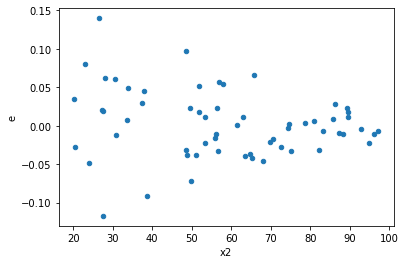

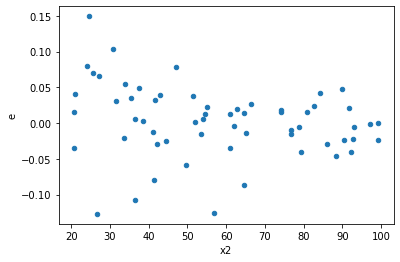

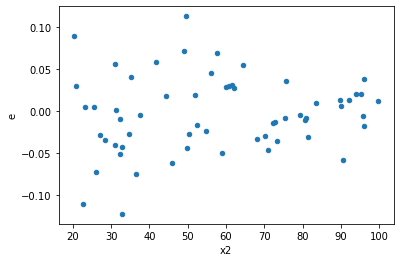

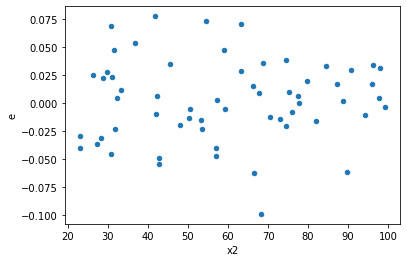

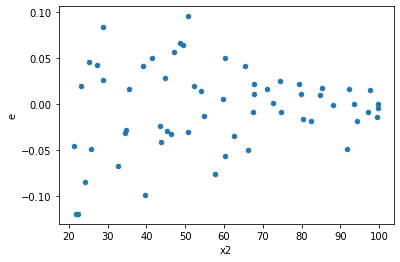

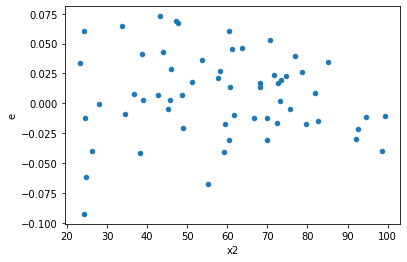

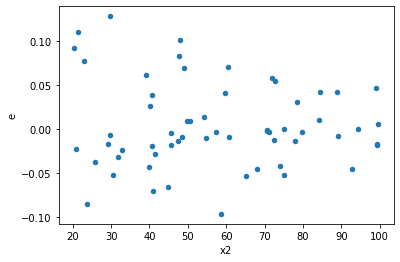

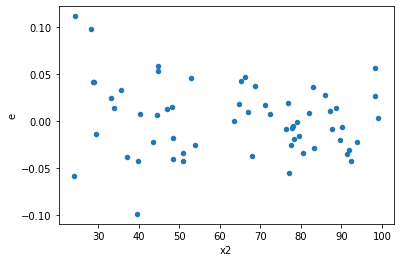

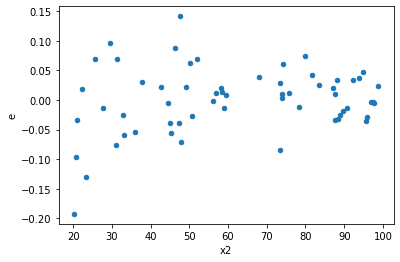

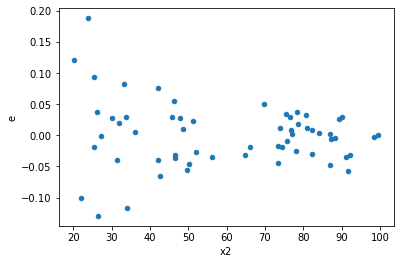

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
57.0,21.0,21.0,0.016685173734745526,0.017837997811760986,0.0007945320826069298,0.0008494284672267136,1.0690927223978974,0.879773012939276,0.560113493530362,0.439886506469638,Reject005=1 : Homoscedasticity
306.0,21.0,21.0,0.02143435181213459,0.023027084190443494,0.0010206834196254567,0.0010965278185925474,1.0743074664570549,0.8710925081113392,0.5644537459443304,0.4355462540556696,Reject005=1 : Homoscedasticity
771.0,21.0,21.0,0.025003582675054085,0.03052480142191177,0.0011906467940501946,0.0014535619724719891,1.2208171052369294,0.6517147490549382,0.6741426254725309,0.3258573745274691,Reject005=1 : Homoscedasticity
848.0,21.0,21.0,0.018363463333566844,0.021387296938862283,0.0008744506349317544,0.0010184427113743943,1.1646657577804578,0.7301140000703774,0.6349429999648113,0.3650570000351887,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.06533138346552005,0.017859631192744495,0.003111018260262859,0.0008504586282259283,0.27336986063015606,0.004462805696529142,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,0.05982198164050904,0.013248479168074269,0.0028486657924051925,0.0006308799603844889,0.22146506693290363,0.001070744989733969,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,0.10172983175371422,0.0103828236793834,0.00484427770255782,0.0004944201752087333,0.10206272339582746,2.207502944848676e-06,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,0.038487797590523315,0.023554041784109726,0.0018327522662153959,0.0011216210373385584,0.6119872598246395,0.2685667432596013,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,0.07842750847762472,0.015762843325346693,0.0037346432608392727,0.0007506115869212711,0.20098615436500591,0.0005319510714181193,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,0.04922161410861283,0.013431314317263065,0.0023438863861244205,0.000639586396060146,0.2728743167102447,0.004410724224797074,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,0.051165354382579256,0.014703249675092504,0.0024364454467894884,0.0007001547464329764,0.28736729868324057,0.006140154323533046,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,0.05819296083533431,0.023719616700097444,0.0027710933731111575,0.0011295055571474972,0.40760285023502496,0.04552407918627693,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,0.0677193653524981,0.010246085449977545,0.0032247316834522906,0.00048790883095131167,0.15130214816166432,6.003514015183193e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    855
Reject005=1 : Homoscedasticity      145
Name: Result_test, dtype: int64